### Soru 1:
* Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren ```"survey_results_public.csv"``` adlı dosyayı okuyarak __survey_19__ adlı DataFrame'e aktarın.
* DataFrame'in satır ve sütun sayısını yazdırın.
* ```Respondent``` sütununu index olarak atayın.
* Aşağıdaki sütunları dataframe'den siliniz:

    ``` ['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']``` 
  
  
* ```DevType``` ya da ```LanguageWorkedWith``` sütununda eksik veri olan satırları siliniz. Kaç satır silindi?
* ```Country``` sütunundaki ```Russian Federation``` ve ```Czech Republic``` değerlerini sırasıyla ```Russia``` ve ```Czechia``` olarak değiştiriniz.
* Haftalık çalışma saati ```(WorkWeekHrs)``` ya da yıllık maaş ```(ConvertedComp)``` sütunlarındaki değerleri, ilgili sütunun ortalamasının %99'undan daha uzakta veri içeren satırları siliniz.
* ```Gender``` sütununda ```Man```, ```Woman``` ve ```NaN``` dışındaki değerleri, ```Non-binary``` değeri ile değiştirin.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)

#### Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren "survey_results_public.csv" adlı dosyayı okuyarak survey_19 adlı DataFrame'e aktarın.


In [3]:
survey_19=pd.read_csv("survey_results_public.csv")

#### DataFrame'in satır ve sütun sayısını yazdırın.


In [4]:
print("Satır:",len(survey_19))
print("Sutun:",len(survey_19.columns))

Satır: 88883
Sutun: 85


#### Respondent sütununu index olarak atayın.

In [5]:
survey_19.set_index("Respondent",inplace=True)

#### Aşağıdaki sütunları dataframe'den siliniz:

 ``` ['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']``` 


In [6]:
survey_19.drop(columns=['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent'],inplace=True)

####  ```DevType``` ya da ```LanguageWorkedWith``` sütununda eksik veri olan satırları siliniz. Kaç satır silindi?

In [7]:
print("before:",survey_19.shape)
survey_19.dropna(subset=["LanguageWorkedWith","DevType"],inplace=True)
print("before:",survey_19.shape)

before: (88883, 70)
before: (80532, 70)



#### ```Country``` sütunundaki ```Russian Federation``` ve ```Czech Republic``` değerlerini sırasıyla ```Russia``` ve ```Czechia``` olarak değiştiriniz.


In [8]:
survey_19.Country.replace({"Russian Federation":"Russia","Czech Republic":"Czechia"},inplace=True)

#### Haftalık çalışma saati ```(WorkWeekHrs)``` ya da yıllık maaş ```(ConvertedComp)``` sütunlarındaki değerleri, ilgili sütunun ortalamasının %99'undan daha uzakta veri içeren satırları siliniz.


In [9]:
mean_workweekhrs=survey_19.WorkWeekHrs.mean()
mean_convervedcomp=survey_19.ConvertedComp.mean()
print(mean_workweekhrs,mean_convervedcomp)

42.10461919774146 126919.92871196939


In [10]:
survey_19=survey_19[np.logical_and(survey_19.WorkWeekHrs>mean_workweekhrs*0.01,survey_19.WorkWeekHrs<mean_workweekhrs*1.99)]
survey_19=survey_19[np.logical_and(survey_19.ConvertedComp>mean_convervedcomp*0.01,survey_19.ConvertedComp<mean_convervedcomp*1.99)]
survey_19.shape

(49430, 70)

#### ```Gender``` sütununda ```Man```, ```Woman``` ve ```NaN``` dışındaki değerleri, ```Non-binary``` değeri ile değiştirin.

In [11]:
Gender_list=["Man","Woman",np.NaN]
survey_19.Gender.value_counts(dropna=False)

Man                                                            44742
Woman                                                           3380
NaN                                                              763
Non-binary, genderqueer, or gender non-conforming                287
Man;Non-binary, genderqueer, or gender non-conforming            105
Woman;Non-binary, genderqueer, or gender non-conforming           99
Woman;Man                                                         34
Woman;Man;Non-binary, genderqueer, or gender non-conforming       20
Name: Gender, dtype: int64

In [12]:
survey_19.Gender=survey_19.Gender.apply(lambda x:"Non Binary" if x not in Gender_list else x)
survey_19.groupby("Gender").size()

Gender
Man           44742
Non Binary      545
Woman          3380
dtype: int64

In [13]:
survey_19.Gender.value_counts(dropna=False)

Man           44742
Woman          3380
NaN             763
Non Binary      545
Name: Gender, dtype: int64

### Soru 2:
* ```Age``` sütununu 0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99 binleri ile aralığa çevirerek ```AgeInterval``` adında yeni bir sütun oluşturunuz.
* Ankete katılanların yaş aralıklarına göre dağılımını pasta grafiğinde gösteriniz. 
* (19-24] yaş aralığının en çok kullandığı sosyal medya nedir?

In [14]:
survey_19["AgeInterval"]=pd.cut(survey_19.Age,bins=[ 0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99 ])
survey_19.head(3)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,Extraversion,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,AgeInterval
Respondent,,,,,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,In real life (in person),28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,"(24, 29]"
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,In real life (in person),22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,"(19, 24]"
9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,In real life (in person),23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,"(19, 24]"


In [15]:
interval_df=survey_19.AgeInterval.value_counts()
interval_df

(24, 29]    15040
(29, 34]    10790
(19, 24]     8110
(34, 39]     6467
(39, 44]     3210
(44, 49]     1620
(49, 54]      990
(54, 59]      491
(15, 19]      467
(59, 99]      318
(0, 15]        13
Name: AgeInterval, dtype: int64

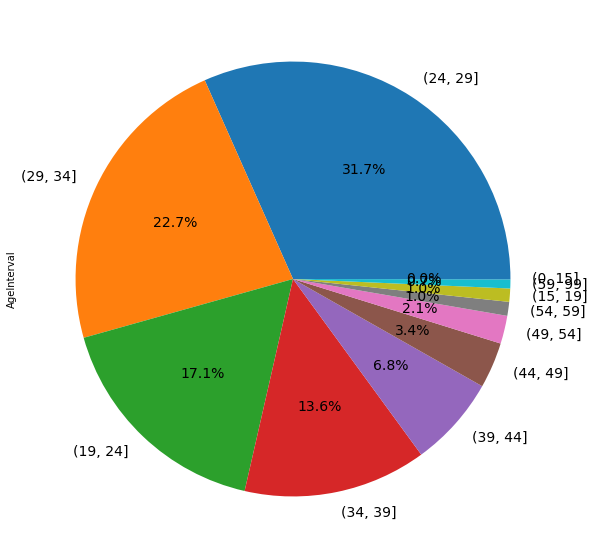

In [16]:
interval_df.plot.pie(figsize=(10,10),autopct='%1.1f%%',fontsize=14)

In [17]:
survey_19[survey_19.AgeInterval.astype(str).str.contains("19.0, 24.0")].SocialMedia.value_counts().idxmax()

'Reddit'

In [18]:
survey_19[np.logical_and(survey_19.Age>19,survey_19.Age<=25)].SocialMedia.value_counts().idxmax()

'Reddit'

### Soru 3:
* DataFrame'i kariyer memnuniyetine ```(CareerSat)``` göre gruplayıp her bir memnuniyet grubundakilerin yıllık kazanç ```(ConvertedComp)``` ortalamasını bularak çizgi grafiği çiziniz. Çizgi grafiğinde X-ekseni en düşük memnuniyetten en yüksek memnuniyete doğru olmalıdır.

In [19]:
group_career=survey_19.groupby("CareerSat").ConvertedComp.mean()
group_career

CareerSat
Neither satisfied nor dissatisfied    46708.370281
Slightly dissatisfied                 51591.204158
Slightly satisfied                    58907.058012
Very dissatisfied                     53372.036356
Very satisfied                        74243.780137
Name: ConvertedComp, dtype: float64

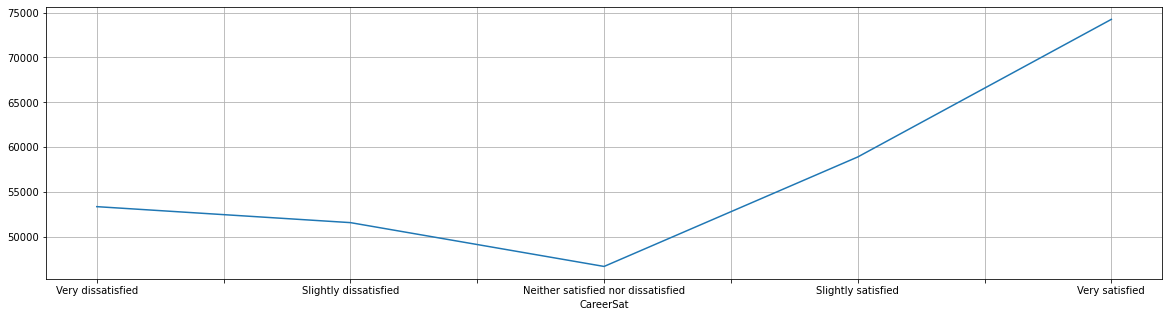

In [20]:
order_list=["Very dissatisfied","Slightly dissatisfied","Neither satisfied nor dissatisfied","Slightly satisfied","Very satisfied"]
group_career=group_career.reindex(order_list)
group_career.plot.line(grid=True,figsize=(20,5))

### Soru 4: 
Kadınların daha çok tercih ettiği/edildiği (ankete katılan kadın-erkek oranından daha yüksek orana sahip) geliştirici tipleri ```(DevType)```nelerdir?
* Her bir ```DevType``` tipinin sütun olarak, ankete katılanların da satır olarak temsil edildiği yeni bir DataFrame oluşturup __devtype_df__ adlı değişkene atayın.
* Oluşan __devtype_df__ DataFrame'ine ```Gender``` sütununu ekleyin.
* DataFrame'i cinsiyete göre gruplayarak her bir ```DevType``` için cinsiyete göre sayıları bulun.
* ```DevType``` tiplerindeki kadın-erkek oranlarını, ankete katılan kadın-erkek oranı ile karşılaştırarak kadınların daha çok tercih ettiği/edildiği ```DevType``` tiplerini listeleyin.

In [21]:
devtype_df=survey_19.DevType.str.get_dummies(sep=';')
devtype_df

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
Respondent,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,1,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
13,0,1,0,1,0,1,0,1,1,0,...,0,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
88878,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
88879,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
devtype_df["Gender"]=survey_19.loc[list(devtype_df.index)].Gender
devtype_df

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator,Gender
Respondent,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Man
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Man
9,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Man
10,0,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
13,0,1,0,1,0,1,0,1,1,0,...,1,1,1,0,0,0,1,0,1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Man
88878,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Man
88879,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Man


In [23]:
devtype_df=devtype_df.groupby("Gender").agg(["sum"])
devtype_df

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Gender,,,,,,,,,,,,,,,,,,,,,
Man,2609,3313,3329,5489,4264,5850,3755,23733,9955,4001,...,2238,3301,1774,2422,320,2154,1764,1028,3173,4987
Non Binary,46,56,46,57,72,71,55,274,104,45,...,36,41,27,25,6,25,25,13,51,69
Woman,188,235,285,217,295,169,248,1322,433,142,...,159,188,53,89,40,108,131,27,234,161


In [24]:
survey_19.Gender.value_counts(dropna=False)

Man           44742
Woman          3380
NaN             763
Non Binary      545
Name: Gender, dtype: int64

In [25]:
devtype_df.index

Index(['Man', 'Non Binary', 'Woman'], dtype='object', name='Gender')

In [26]:
devtype_df.loc[["Man","Woman"]]

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Gender,,,,,,,,,,,,,,,,,,,,,
Man,2609,3313,3329,5489,4264,5850,3755,23733,9955,4001,...,2238,3301,1774,2422,320,2154,1764,1028,3173,4987
Woman,188,235,285,217,295,169,248,1322,433,142,...,159,188,53,89,40,108,131,27,234,161


In [27]:
woman_man=len(survey_19[survey_19.Gender=="Woman"])/len(survey_19[survey_19.Gender=="Man"])
woman_man

0.07554423137097134

In [28]:
devtype_df.loc["Woman"]/devtype_df.loc["Man"]

Academic researcher                            sum    0.072058
Data or business analyst                       sum    0.070933
Data scientist or machine learning specialist  sum    0.085611
Database administrator                         sum    0.039534
Designer                                       sum    0.069184
DevOps specialist                              sum    0.028889
Developer, QA or test                          sum    0.066045
Developer, back-end                            sum    0.055703
Developer, desktop or enterprise applications  sum    0.043496
Developer, embedded applications or devices    sum    0.035491
Developer, front-end                           sum    0.080999
Developer, full-stack                          sum    0.060148
Developer, game or graphics                    sum    0.043741
Developer, mobile                              sum    0.056474
Educator                                       sum    0.071046
Engineer, data                                 sum    0

In [29]:
filter_ratio=devtype_df.apply(lambda x: True if x.loc["Woman"]/x.loc["Man"]>woman_man else False )
filter_ratio

Academic researcher                            sum    False
Data or business analyst                       sum    False
Data scientist or machine learning specialist  sum     True
Database administrator                         sum    False
Designer                                       sum    False
DevOps specialist                              sum    False
Developer, QA or test                          sum    False
Developer, back-end                            sum    False
Developer, desktop or enterprise applications  sum    False
Developer, embedded applications or devices    sum    False
Developer, front-end                           sum     True
Developer, full-stack                          sum    False
Developer, game or graphics                    sum    False
Developer, mobile                              sum    False
Educator                                       sum    False
Engineer, data                                 sum    False
Engineer, site reliability              

In [30]:
devtype_df.loc[:,filter_ratio].columns.get_level_values(0)

Index(['Data scientist or machine learning specialist', 'Developer, front-end',
       'Marketing or sales professional'],
      dtype='object')

### Soru 5: 
Ankete katılım sayısı bakımından ilk ve son 10 ülkeyi tek bir figürde yan yana iki ayrı alt grafik (subplot) olacak şekilde pasta grafiği ile gösteriniz.

Text(0.5, 1.0, 'LOW')

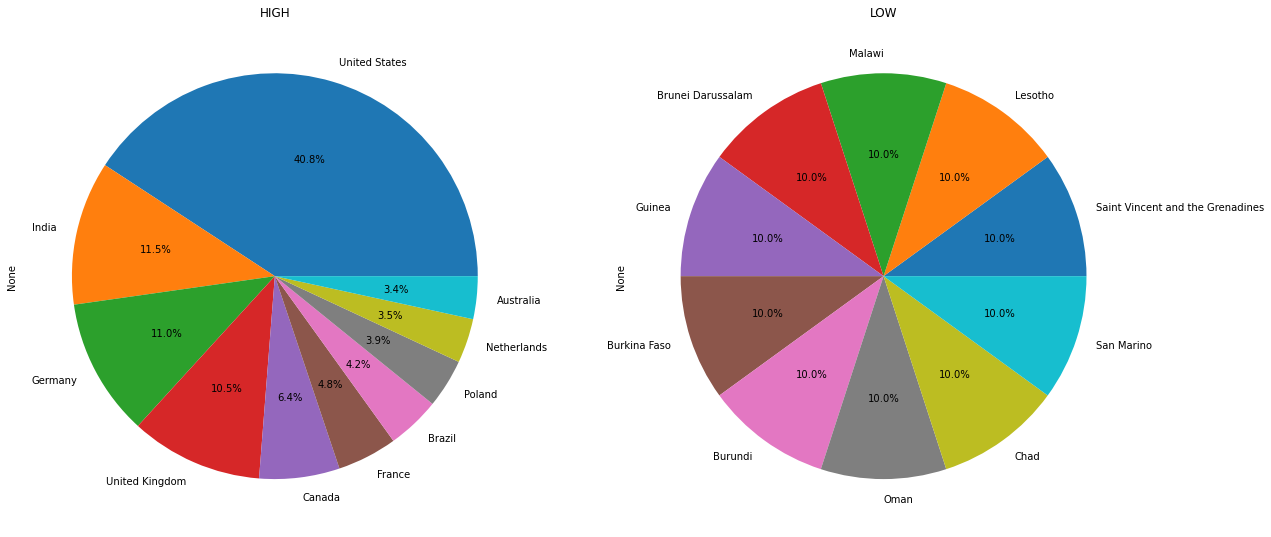

In [31]:
df_topdown=survey_19.groupby("Country").size().sort_values(ascending=False)
df_high=df_topdown.head(10)
df_low=df_topdown.tail(10)               
fig,axes=plt.subplots(1,2,figsize=(20,20))
df_high.plot.pie(ax=axes[0],autopct='%1.1f%%').set_title("HIGH")
df_low.plot.pie(ax=axes[1],autopct='%1.1f%%').set_title("LOW")

### Soru 6: 
Veri Bilimcilerin (```DevType``` sütununda ```Data scientist or machine learning specialist``` değerini içeren) en çok kullandığı dil ```(LanguageWorkedWith)``` nedir? Tüm kullandıkları dillerin yüzdelerini bulunuz ve yatay bar plot olarak gösteriniz.

In [32]:
df_new=survey_19[survey_19.DevType.str.contains("Data scientist or machine learning specialist",regex=True)]
language=pd.Series(df_new.LanguageWorkedWith.str.get_dummies(sep=';').sum(axis=0))
language
#df_new=survey_19[survey_19.DevType.str.contains("Data scientist or machine learning specialist",regex=True)]
#language_df=df_new.LanguageWorkedWith.str.split(";",expand=True)
#language_df=language_df.apply(pd.Series.value_counts).fillna(0)
#language_list=language_df.sum(axis=1)
#language_list

Assembly                  227
Bash/Shell/PowerShell    1779
C                         782
C#                        822
C++                      1083
Clojure                    69
Dart                       50
Elixir                     55
Erlang                     47
F#                         37
Go                        328
HTML/CSS                 1766
Java                     1282
JavaScript               1889
Kotlin                    146
Objective-C               118
Other(s):                 402
PHP                       580
Python                   3053
R                        1194
Ruby                      240
Rust                      129
SQL                      2238
Scala                     376
Swift                     160
TypeScript                510
VBA                       271
WebAssembly                46
dtype: int64

In [33]:
language_percent=language.apply(lambda x:x/language.sum()*100)
language_percent

Assembly                  1.153514
Bash/Shell/PowerShell     9.040094
C                         3.973779
C#                        4.177042
C++                       5.503328
Clojure                   0.350628
Dart                      0.254078
Elixir                    0.279486
Erlang                    0.238833
F#                        0.188018
Go                        1.666751
HTML/CSS                  8.974033
Java                      6.514559
JavaScript                9.599065
Kotlin                    0.741908
Objective-C               0.599624
Other(s):                 2.042787
PHP                       2.947304
Python                   15.514000
R                         6.067381
Ruby                      1.219574
Rust                      0.655521
SQL                      11.372529
Scala                     1.910666
Swift                     0.813049
TypeScript                2.591595
VBA                       1.377102
WebAssembly               0.233752
dtype: float64

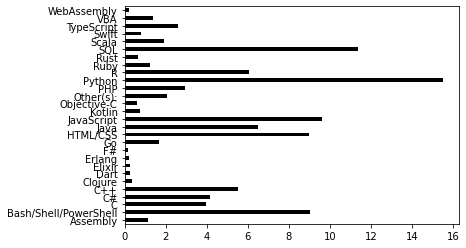

In [34]:
language_percent.plot.barh(color="k")

### Soru 7:
* Haftalık çalışma saatlerinin ```(WorkWeekHrs)``` ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturunuz.
* Ortalamaya göre büyükten küçüğe sıralayınız. 
* Türkiye'nin kaçıncı sırada olduğunu ve haftalık çalışma saatini bulunuz.

In [35]:
Country_WorkWeekHrs=survey_19.groupby("Country").WorkWeekHrs.agg(["mean","std","median"])
#Country_WorkWeekHrs=survey_19.groupby("Country")["WorkWeekHrs"].describe()[["mean","std","50%"]]
Country_WorkWeekHrs

,mean,std,median
Country,,,
Afghanistan,42.375000,6.390562,42.5
Albania,39.918367,11.095864,40.0
Algeria,35.357143,11.140527,40.0
Andorra,42.000000,2.828427,42.0
Angola,45.000000,NaN,45.0
...,...,...,...
"Venezuela, Bolivarian Republic of...",33.741935,12.431057,40.0
Viet Nam,41.243243,8.293934,40.0
Yemen,45.000000,16.583124,40.0


In [36]:
df_workwheekhrs_sort=Country_WorkWeekHrs.sort_values(by="mean",ascending=False).reset_index()[["Country","mean"]]
df_workwheekhrs_sort

,Country,mean
0,Mali,70.000000
1,Turkmenistan,52.333333
2,Burundi,50.000000
3,Seychelles,50.000000
4,Libyan Arab Jamahiriya,50.000000
...,...,...
153,Myanmar,31.444444
154,Somalia,30.750000
155,Rwanda,28.400000
156,Guinea,20.000000


In [37]:
Turkey_rank=df_workwheekhrs_sort[df_workwheekhrs_sort.Country=="Turkey"].index[0]
print("Türkiyenin sıralaması:{0} Haftalık Çalışma Saati:{1}".format(Turkey_rank,df_workwheekhrs_sort.loc[Turkey_rank]["mean"]))

Türkiyenin sıralaması:37 Haftalık Çalışma Saati:41.09061833688699


### Soru 8:
Ankete katılanların ortalama haftada kaç saat kod incelediği bilgisini ```(CodeRevHrs)``` kullanarak 40 saatten az kod inceleyenler ile bir histogram (bins=20) çiziniz.


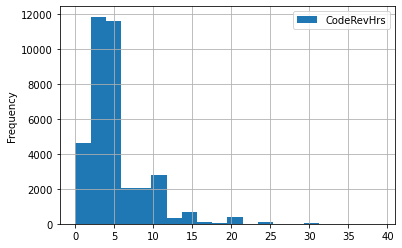

In [38]:
df_CodeRevHrs=survey_19[survey_19.CodeRevHrs<40]["CodeRevHrs"]
df_CodeRevHrs.plot.hist(bins=20,alpha=1,grid=True,legend=True)           

### Soru 9:
* ```MainBranch``` sütununda bulunan değerleri aşağıdaki değerler ile değiştirin.

    ``` {'I am a student who is learning to code': 'Student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
    'I am a developer by profession':  'Developer',
    'I code primarily as a hobby':   'Code as hobby',
    'I used to be a developer by profession, but no longer am': 'Was a Developer'} 
    ```
* Ana branş ```(MainBranch)``` X-ekseninde olacak şekilde her bir branştakilerin sayısını bar plot ile gösteriniz. Her bir bar, Cinsiyet ```(Gender)``` sayısına göre yığıt (stacked) şeklinde gösterilmelidir. 
* Ana branşı ```Developer``` olan ve Türkiye'den ankete katılanların eğitim seviyelerine göre dağılımını pasta grafiği ile gösteriniz.

#### ```MainBranch``` sütununda bulunan değerleri aşağıdaki değerler ile değiştirin.

    ``` {'I am a student who is learning to code': 'Student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
    'I am a developer by profession':  'Developer',
    'I code primarily as a hobby':   'Code as hobby',
    'I used to be a developer by profession, but no longer am': 'Was a Developer'} 

In [39]:
mainbranch_dict={'I am a student who is learning to code': 'Student',
  'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
  'I am a developer by profession':  'Developer',
  'I code primarily as a hobby':   'Code as hobby',
  'I used to be a developer by profession, but no longer am': 'Was a Developer'}
survey_19.MainBranch.replace(mainbranch_dict,inplace=True)

#### Ana branş ```(MainBranch)``` X-ekseninde olacak şekilde her bir branştakilerin sayısını bar plot ile gösteriniz. Her bir bar, Cinsiyet ```(Gender)``` sayısına göre yığıt (stacked) şeklinde gösterilmelidir. 

In [40]:
df_MainBranch=pd.DataFrame(survey_19.groupby(["MainBranch","Gender"]).size(),columns=["Size"])
df_MainBranch=pd.DataFrame(df_MainBranch.reset_index(level=[0,1]))
df_MainBranch

,MainBranch,Gender,Size
0,Developer,Man,40865
1,Developer,Non Binary,475
2,Developer,Woman,2975
3,Not a Developer,Man,3877
4,Not a Developer,Non Binary,70
5,Not a Developer,Woman,405


In [41]:
df_MainBranch=df_MainBranch.pivot(index="MainBranch",columns="Gender",values="Size")
df_MainBranch

Gender,Man,Non Binary,Woman
MainBranch,,,
Developer,40865,475,2975
Not a Developer,3877,70,405


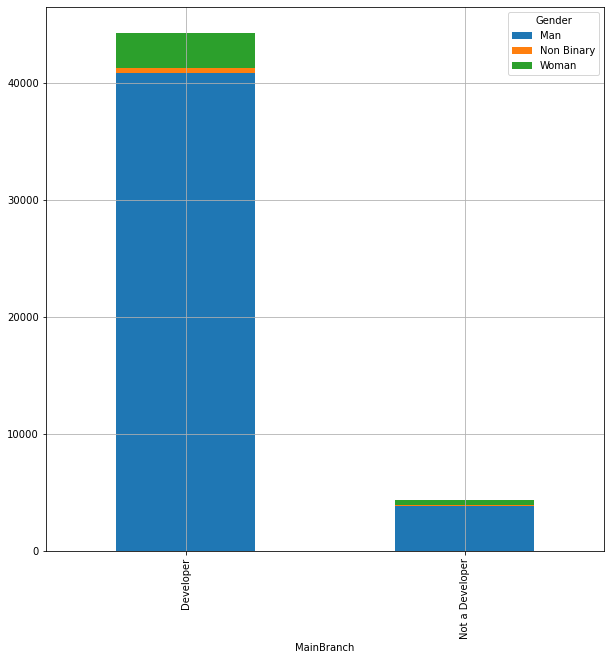

In [42]:
df_MainBranch.plot.bar(stacked=True,figsize=(10,10),grid=True)

#### Ana branşı ```Developer``` olan ve Türkiye'den ankete katılanların eğitim seviyelerine göre dağılımını pasta grafiği ile gösteriniz.

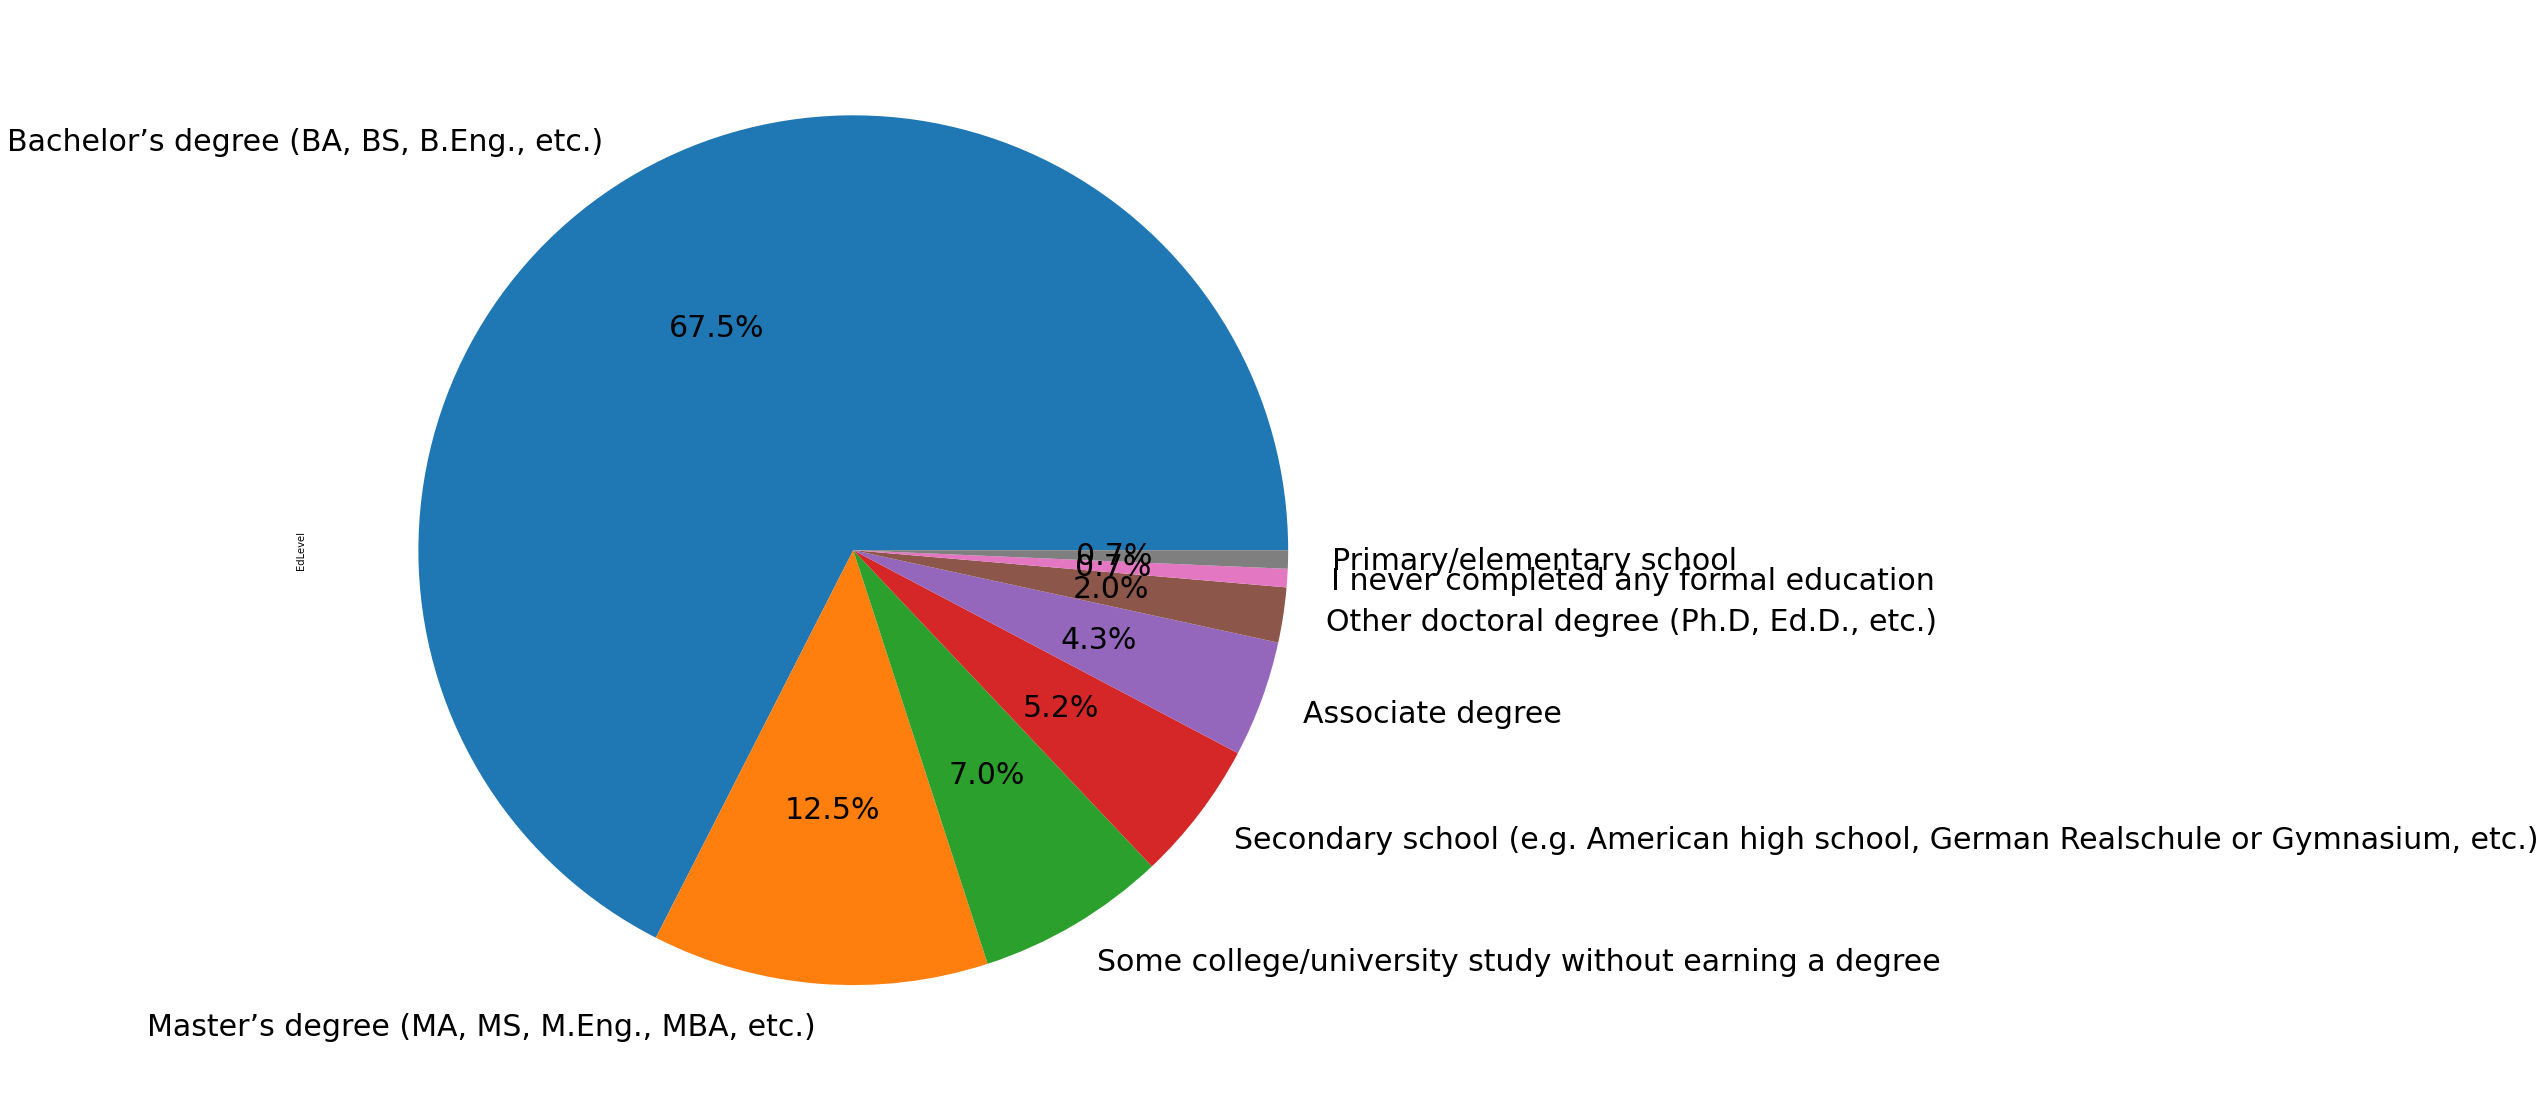

In [43]:
df_developer_turkey=survey_19[np.logical_and(survey_19.MainBranch=="Developer",survey_19.Country=="Turkey")]
df_developer_turkey_education=df_developer_turkey.EdLevel.value_counts()
df_developer_turkey_education.plot.pie(autopct='%1.1f%%',figsize=(20,20),fontsize=30)

### Soru 10:
Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşını bulunuz. 
* ```CurrencySymbol, CompTotal ve CompFreq``` sütunlarını kullanın.
* Her üç sütundan herhangi biri NaN olan satırları ihmal ediniz. 
* Frekansı ```(CompFreq)``` haftalık olanlar için bir yılı 50 hafta, aylık olanlar için ise 12 ay olarak düşününüz.

In [44]:
df_turkey_maas=survey_19[np.logical_and(survey_19.Country=="Turkey",survey_19.CurrencySymbol=="TRY")][["CurrencySymbol","CompTotal","CompFreq","ConvertedComp"]]
df_turkey_maas.dropna(subset=["CurrencySymbol","CompTotal","CompFreq"],inplace=True)

In [45]:
pd.DataFrame(df_turkey_maas.
             apply(lambda x:x["CompTotal"]*12 if x["CompFreq"]=="Monthly" 
                                            else x["CompTotal"]*50 if x["CompFreq"]=="Monthly" 
                                            else x["CompTotal"],
                                            axis=1),
             columns=["Yıllık Brüt"]).head(10)

,Yıllık Brüt
Respondent,
123,96000.0
699,120000.0
718,160000.0
803,144000.0
968,98400.0
1013,30000.0
1088,67200.0
1676,194400.0
1709,66000.0


In [46]:
monthly=pd.DataFrame(df_turkey_maas[df_turkey_maas.CompFreq=="Monthly"].CompTotal*12)
weekly=pd.DataFrame(df_turkey_maas[df_turkey_maas.CompFreq=="Weekly"].CompTotal*50)
yearly=pd.DataFrame(df_turkey_maas[df_turkey_maas.CompFreq=="Yearly"].CompTotal)
salary_list=[monthly,weekly,yearly]
df_turkey_maas["Yıllık Ortalama Brüt"]=pd.concat(salary_list)
df_turkey_maas.head(10)

,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,Yıllık Ortalama Brüt
Respondent,,,,,
123,TRY,8000.0,Monthly,18432.0,96000.0
699,TRY,10000.0,Monthly,23040.0,120000.0
718,TRY,160000.0,Yearly,30720.0,160000.0
803,TRY,12000.0,Monthly,27648.0,144000.0
968,TRY,8200.0,Monthly,18888.0,98400.0
1013,TRY,2500.0,Monthly,5760.0,30000.0
1088,TRY,5600.0,Monthly,12900.0,67200.0
1676,TRY,194400.0,Yearly,37325.0,194400.0
1709,TRY,5500.0,Monthly,12672.0,66000.0


### Soru 11:
Her bir işletim sistemi ```(OpSys)``` için,  açık kaynağa katkı verme sıklıklarına ```(OpenSourcer)``` göre anketör sayılarını bar grafik ile gösteriniz.

In [47]:
df_OpSys=pd.DataFrame(survey_19.groupby(["OpSys","OpenSourcer"]).size(),columns=["Size"])
df_OpSys.reset_index(level=[1],inplace=True)
df_OpSys.head(10)

,OpenSourcer,Size
OpSys,,
BSD,Less than once a month but more than once per ...,10
BSD,Less than once per year,13
BSD,Never,8
BSD,Once a month or more often,8
Linux-based,Less than once a month but more than once per ...,3509
Linux-based,Less than once per year,3491
Linux-based,Never,3023
Linux-based,Once a month or more often,2024
MacOS,Less than once a month but more than once per ...,4322


In [48]:
df_OpSys=df_OpSys.pivot(columns="OpenSourcer",values="Size")
df_OpSys

OpenSourcer,Less than once a month but more than once per year,Less than once per year,Never,Once a month or more often
OpSys,,,,
BSD,10,13,8,8
Linux-based,3509,3491,3023,2024
MacOS,4322,4664,4172,1872
Windows,4218,6498,9726,1631


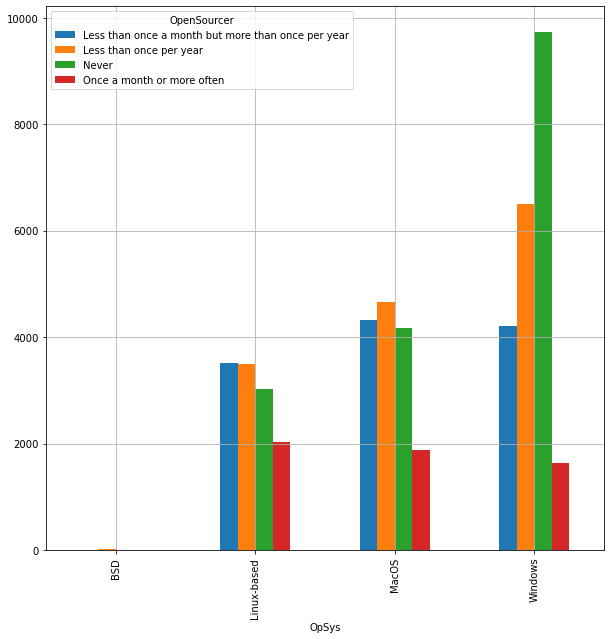

In [49]:
df_OpSys.plot.bar(figsize=(10,10),grid=True)

### Soru 12:
* Ülkelerdeki eğitim düzeyi ```(EdLevel)``` oranlarını içeren __country_edlevels__ adında bir dataframe oluşturunuz. (Satır ülkeler, sütun eğitim düzeyleri olacak şekilde)
* Ankete en çok katılım gösteren 5 ülkeyi, her bir eğitim düzeyi oranı için karşılaştırmalı olarak gösteren bir bar plot çiziniz.

In [50]:
country_edlevels=pd.DataFrame(survey_19.groupby(["Country","EdLevel"]).size(),columns=["Size"]).reset_index(level=[1])
country_edlevels.head(5)

,EdLevel,Size
Country,,
Afghanistan,"Bachelor’s degree (BA, BS, B.Eng., etc.)",7
Afghanistan,"Secondary school (e.g. American high school, G...",1
Albania,"Bachelor’s degree (BA, BS, B.Eng., etc.)",24
Albania,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",18
Albania,"Professional degree (JD, MD, etc.)",1


In [51]:
country_edlevels=country_edlevels.pivot(columns="EdLevel",values="Size").fillna(0)
country_edlevels.head(5)

EdLevel,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I never completed any formal education,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree
Country,,,,,,,,,
Afghanistan,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Albania,0.0,24.0,0.0,18.0,0.0,0.0,1.0,3.0,3.0
Algeria,0.0,5.0,0.0,22.0,1.0,1.0,1.0,0.0,2.0
Andorra,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Argentina,20.0,99.0,2.0,38.0,5.0,2.0,19.0,42.0,145.0


In [52]:
top5=survey_19.Country.value_counts().head().index.tolist()
top5_country_edlevels=country_edlevels.loc[top5]
top5_country_edlevels

EdLevel,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I never completed any formal education,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree
Country,,,,,,,,,
United States,573.0,7606.0,34.0,2221.0,361.0,37.0,56.0,274.0,1557.0
India,17.0,2535.0,4.0,840.0,9.0,3.0,14.0,29.0,80.0
Germany,129.0,993.0,6.0,1180.0,156.0,14.0,37.0,464.0,367.0
United Kingdom,44.0,1617.0,7.0,780.0,164.0,6.0,9.0,162.0,468.0
Canada,217.0,1071.0,12.0,295.0,46.0,5.0,15.0,63.0,219.0


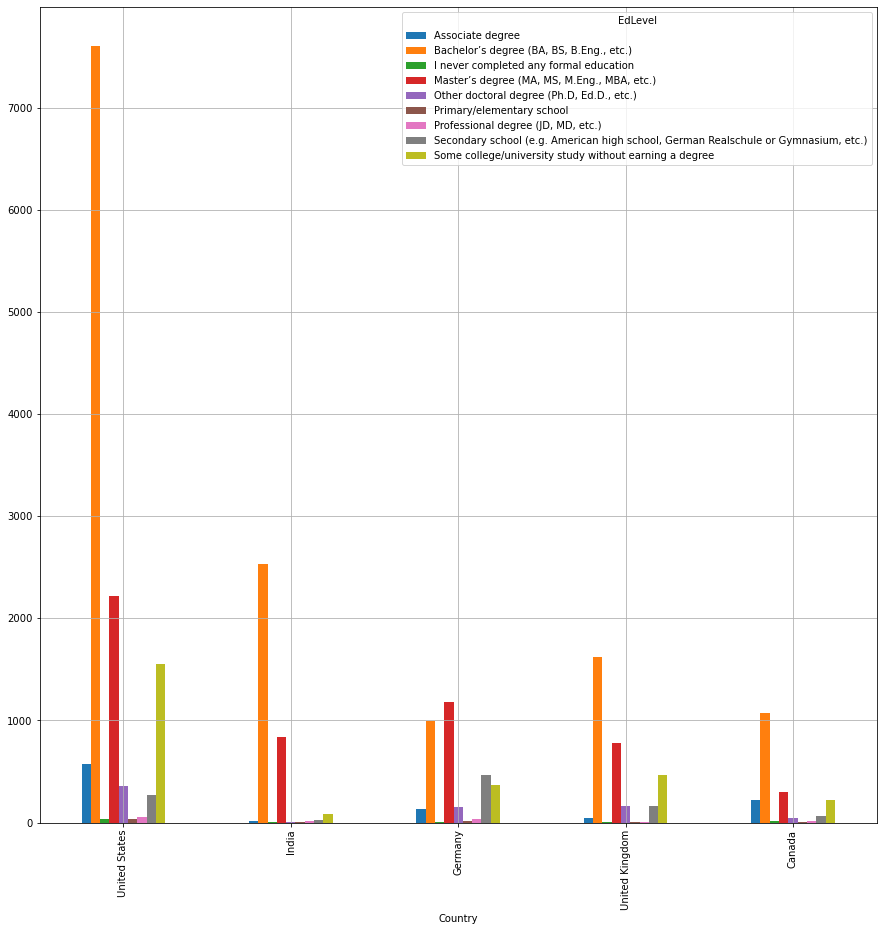

In [53]:
top5_country_edlevels.plot.bar(figsize=(15,15),grid=True)

### Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```Country, Continent, CurrencyCode``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak 
    * ```NA``` filtreleme yapmadan (```North America``` kıtasının kısaltması olan ```NA```'yı ```NaN``` değer olarak okumamak için)
  
  okuyarak __country_info__ adlı DataFrame'e aktarınız.
  
  
*     

           {AF : Africa
            AS : Asia			
            EU : Europe			
            NA : North America		
            OC : Oceania			
            SA : South America		
            AN : Antarctica	} 

   yukarıdaki haritalamayı kullanarak kıta isimlerini içeren ```ContinentName``` isimli yeni bir sütun oluşturunuz.

In [54]:
country_info=pd.read_table("https://download.geonames.org/export/dump/countryInfo.txt",skiprows=49,na_filter=False)[["Country","Continent","CurrencyCode"]]
country_info.set_index("Country",inplace=True)
country_info.head()

,Continent,CurrencyCode
Country,,
Andorra,EU,EUR
United Arab Emirates,AS,AED
Afghanistan,AS,AFN
Antigua and Barbuda,NA,XCD
Anguilla,NA,XCD


In [55]:
country_info["ContinentName"]=country_info.Continent.map({
    "AF":"Africa",
    "AS":"Asia",
    "EU":"Europe",
    "NA":"North America",
    "OC":"Oceania",
    "SA":"South America",
    "AN":"Antarctica"} )
country_info.head()

,Continent,CurrencyCode,ContinentName
Country,,,
Andorra,EU,EUR,Europe
United Arab Emirates,AS,AED,Asia
Afghanistan,AS,AFN,Asia
Antigua and Barbuda,NA,XCD,North America
Anguilla,NA,XCD,North America


### Soru 14:

* __survey_19__ dataframe'i ile __country_info__ dataframe'ini ülke bazında birleştirip __merged_survey__ isimli yeni bir dataframe'e aktarınız.
* Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı nedir?
* Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleyiniz.
* Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleyiniz.
* Avrupa kıtasındaki ülkelerin ortalama haftalık çalışma saati ```(WorkWeekHrs)``` ve ortalama yıllık maaşlarını ```(ConvertedComp)``` saçılım (scatter) grafiğinde gösteriniz.

In [56]:
merged_survey=pd.merge(survey_19,country_info,on="Country")
merged_survey.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,AgeInterval,Continent,CurrencyCode,ContinentName
0,Not a Developer,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,"(24, 29]",AS,THB,Asia
1,Developer,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",Taken an online course in programming or softw...,...,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Neither easy nor difficult,"(24, 29]",AS,THB,Asia


#### Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı nedir?

In [57]:
len(merged_survey[merged_survey.CurrencySymbol!=merged_survey.CurrencyCode].index)

1620

#### Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleyiniz.

In [58]:
merged_survey.CurrencySymbol.value_counts().head()

USD    13909
EUR    11103
INR     3525
GBP     3335
CAD     1977
Name: CurrencySymbol, dtype: int64

#### Avrupa kıtasındaki ülkelerin ortalama haftalık çalışma saati ```(WorkWeekHrs)``` ve ortalama yıllık maaşlarını ```(ConvertedComp)``` saçılım (scatter) grafiğinde gösteriniz.

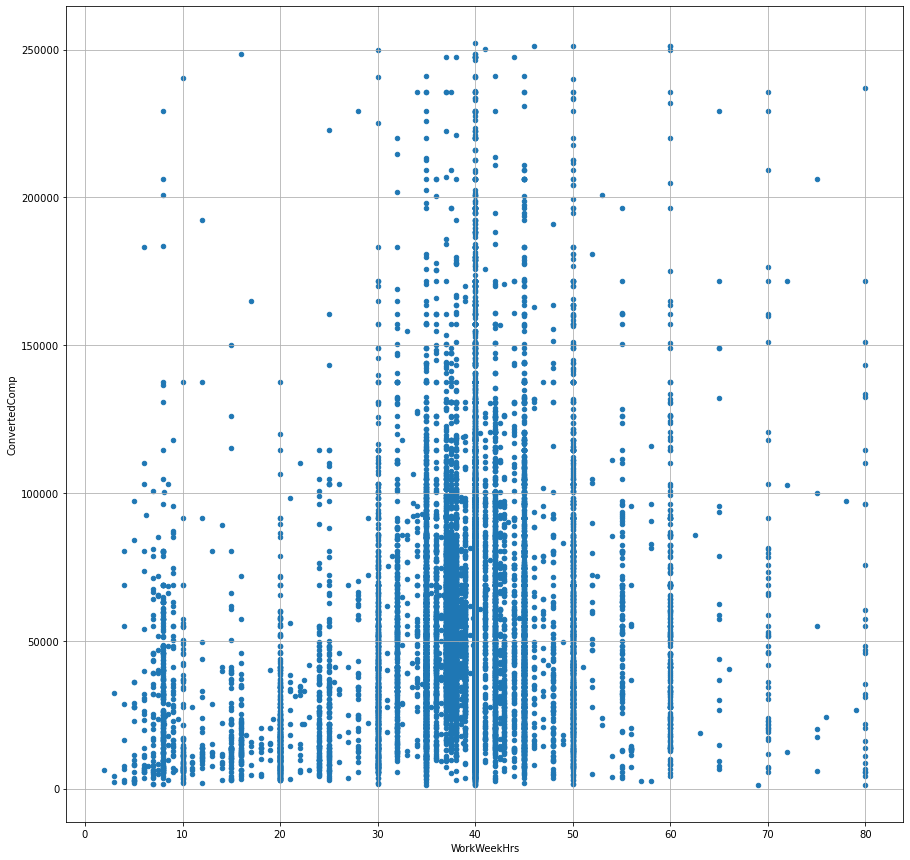

In [59]:
Avrupa_scatter=merged_survey[merged_survey.ContinentName=="Europe"]
Avrupa_scatter.plot.scatter(x="WorkWeekHrs",y="ConvertedComp",grid=True,figsize=(15,15))

#### Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleyiniz.

In [60]:
maxConverted_eachContinent=list(merged_survey.groupby(["Continent"]).ConvertedComp.idxmax())
maxConverted_eachContinent

[47939, 13317, 17462, 4660, 21094, 22938]

In [61]:
merged_survey.iloc[list(maxConverted_eachContinent)][["Continent","Country","ConvertedComp"]].set_index("Continent")

,Country,ConvertedComp
Continent,,
AF,Cameroon,247476.0
AS,India,251868.0
EU,Germany,252065.0
NA,United States,252000.0
OC,Australia,228000.0
SA,Brazil,229476.0
